### Deliverable 3: Optimize the Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN"], axis=1)

In [3]:
application_df.head(5)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at NAME counts for binning 
application_df.NAME.value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot: ylabel='Density'>

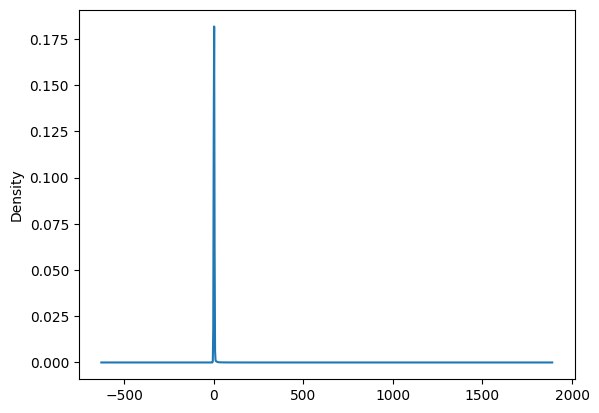

In [6]:
# Visualize the value counts of NAME
name_count = application_df.NAME.value_counts()
name_count.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_name = list(name_count[name_count < 2].index)

# Replace in dataframe
for name in replace_name:
    application_df.NAME = application_df.NAME.replace(name, "OTHER")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

OTHER                                                                 18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [8]:
# # Look at SPECIAL_CONSIDERATIONS counts for binning
# application_df.SPECIAL_CONSIDERATIONS.value_counts()

In [9]:
# # Drop rows with SPECIAL_CONSIDERATIONS
# application_df = application_df[application_df.SPECIAL_CONSIDERATIONS == "N"]
# application_df.STATUS

In [10]:
# # Drop SPECIAL_CONSIDERATIONS column
# application_df = application_df.drop(columns="SPECIAL_CONSIDERATIONS")
# application_df

In [11]:
# # Look at INCOME_AMT counts for binning
# application_df.INCOME_AMT.value_counts()

In [12]:
# # Look at STATUS counts for binning
# application_df.STATUS.value_counts()

In [13]:
# # Drop rows with inactive funds
# application_df = application_df[application_df.STATUS != 0]
# application_df.STATUS

In [14]:
# # Drop STATUS column
# application_df = application_df.drop(columns="STATUS")
# application_df

In [15]:
# Look at ASK_AMT value counts for binning
application_df.ASK_AMT.value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot: ylabel='Density'>

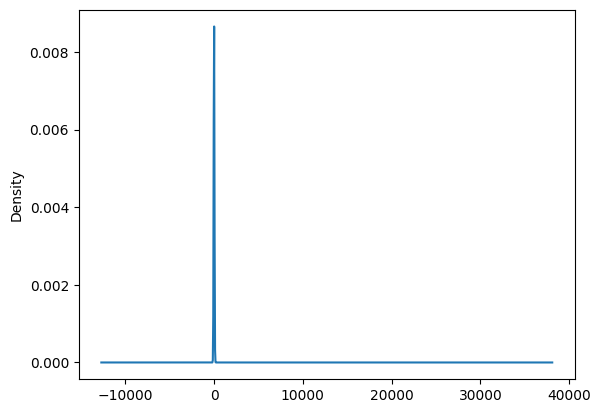

In [16]:
# Visualize the value counts of ASK_AMT
ask_count = application_df.ASK_AMT.value_counts()
ask_count.plot.density()

In [17]:
# # Determine which values to replace if counts are less than ...?
# replace_ask = list(ask_count[ask_count < 5000].index)

# # Replace in dataframe
# for ask in replace_ask:
#     application_df.ASK_AMT = application_df.ASK_AMT.replace(ask,1-4999)
    
# # Check to make sure binning was successful
# application_df.ASK_AMT.value_counts()

In [18]:
# Look at APPLICATION_TYPE value counts for binning
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot: ylabel='Density'>

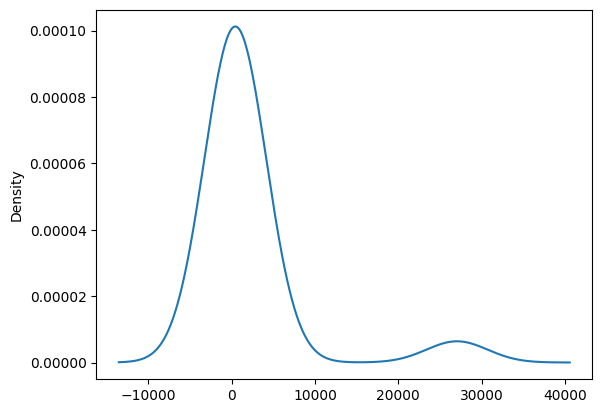

In [19]:
# Visualize the value counts of APPLICATION_TYPE
type_count = application_df.APPLICATION_TYPE.value_counts()
type_count.plot.density()

In [20]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count[type_count < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"OTHER")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
OTHER      120
Name: APPLICATION_TYPE, dtype: int64

In [21]:
# Look at CLASSIFICATION value counts for binning
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot: ylabel='Density'>

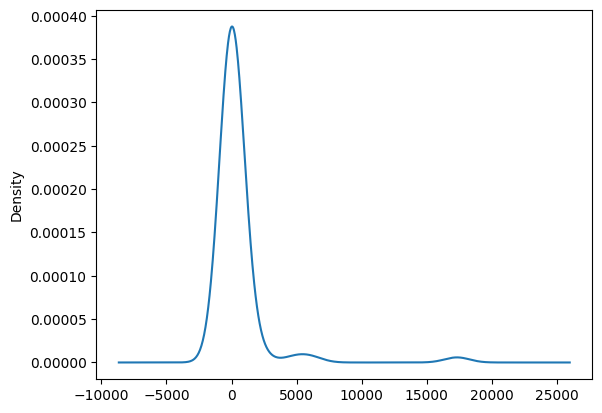

In [22]:
# Visualize the value counts of CLASSIFICATION
class_count = application_df.CLASSIFICATION.value_counts()
class_count.plot.density()

In [23]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_count[class_count < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"OTHER")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
OTHER     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [24]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [25]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)

# Set options to show all columns
pd.options.display.max_columns = 50

# View the dataframe
encode_df.head(5)

,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALASKA PTA,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALLIANCE FOR RETIRED AMERICANS,NAME_ALLIANCE OF DIVINE LOVE INC,NAME_ALLIANCE OF THE FRIENDS OF THE DEKALB COUNTY LIBRARY,NAME_ALPHA DELTA KAPPA SORORITY INC,NAME_ALPHA GAMMA RHO FRATERNITY,NAME_ALPHA KAPPA PSI FRATERNITY,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALPHA SIGMA PHI FRATERNITY INC,...,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_OTHER,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df.head(5)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALASKA PTA,...,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_OTHER,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,OTHER,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,OTHER,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,OTHER,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,OTHER,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.drop(application_cat, 1)
application_df.head(5)

/var/folders/bj/m8tksvx513b63lgr8fw9z7vc0000gn/T/ipykernel_8404/2302023151.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat, 1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALASKA PTA,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALLIANCE FOR RETIRED AMERICANS,NAME_ALLIANCE OF DIVINE LOVE INC,NAME_ALLIANCE OF THE FRIENDS OF THE DEKALB COUNTY LIBRARY,NAME_ALPHA DELTA KAPPA SORORITY INC,NAME_ALPHA GAMMA RHO FRATERNITY,NAME_ALPHA KAPPA PSI FRATERNITY,NAME_ALPHA PHI OMEGA,...,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_OTHER,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns = "IS_SUCCESSFUL").values

y = application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 70
hidden_nodes_layer3 = 60
# hidden_nodes_layer4 = 10
# hidden_nodes_layer5 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="gelu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# # Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="gelu"))

# # Fifth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               84000     
                                                                 
 dense_1 (Dense)             (None, 90)                9090      
                                                                 
 dense_2 (Dense)             (None, 80)                7280      
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total params: 100,451
Trainable params: 100,451
Non-trainable params: 0
_________________________________________________________________


2022-10-21 15:08:10.677111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 15:08:10.677190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimized_checkpoints/",exist_ok=True)
checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"

In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    save_freq = 5
)

In [33]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=1, callbacks=[cp_callback])

2022-10-21 15:08:10.827349: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/804 [..............................] - ETA: 4:59 - loss: 0.6988 - accuracy: 0.5625
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5


2022-10-21 15:08:11.046874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  7/804 [..............................] - ETA: 7s - loss: 0.6764 - accuracy: 0.6339  
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 14/804 [..............................] - ETA: 6s - loss: 0.6446 - accuracy: 0.6875
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 6s - loss: 0.6113 - accuracy: 0.7172
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 26/804 [..............................] - ETA: 6s - loss: 0.6019 - accuracy: 0.7248
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.5812 - accuracy: 0.7339
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.5698 - accuracy: 0.7352
Epoch 1: saving model to optimized_checkpoint

329/804 [===========>..................] - ETA: 3s - loss: 0.4818 - accuracy: 0.7748
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.4800 - accuracy: 0.7755
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
342/804 [===========>..................] - ETA: 3s - loss: 0.4786 - accuracy: 0.7755
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.4779 - accuracy: 0.7756
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.4760 - accuracy: 0.7768
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.4766 - accuracy: 0.7760
Epoch 1: saving model to optimized_checkpoints/

647/804 [=======================>......] - ETA: 1s - loss: 0.4610 - accuracy: 0.7825
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.4611 - accuracy: 0.7823
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.4612 - accuracy: 0.7822
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.4607 - accuracy: 0.7827
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5

Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.4604 - accuracy: 0.7829
Epoch 1: saving model to optimized_checkpoints/weights.01.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.4599 - accuracy: 0.7831
Epoch 1: saving model to optimized_checkpoints/

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-10-21 15:08:17.785384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 - 1s - loss: 0.4385 - accuracy: 0.7881 - 857ms/epoch - 3ms/step
Loss: 0.43850988149642944, Accuracy: 0.7881049513816833


In [35]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharityOptimized.h5')